# Dartboard as an Object Function
### Seminar work on Heuristic Optimalization
#### Author: Ales Suchomel
#### Year: 2020

### Goals:


### Introduction:


### Workflow outline:


In [20]:
# Import path to source directory (bit of a hack in Jupyter)
import sys
import os
pwd = %pwd
sys.path.append(os.path.join(pwd, os.path.join('..','..', 'src')))

# Ensure modules are reloaded on any change (very useful when developing code on the fly)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [219]:
# Import extrenal librarires
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import our code
from objfun_darts import Dartboard, DartsAvgScore
from objfun_darts import DartsPlotter

<IPython.core.display.Javascript object>


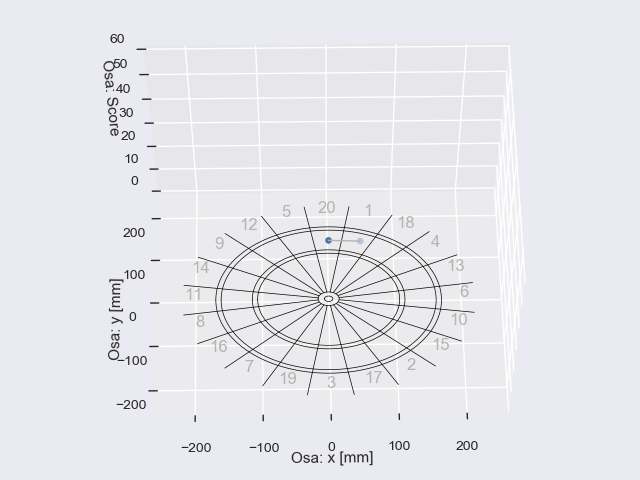

In [213]:
dartboard = Dartboard()
plotter = DartsPlotter()
plotter.plot_points(dartboard, [np.array([0, 50]), np.array([10, 130])])

<IPython.core.display.Javascript object>


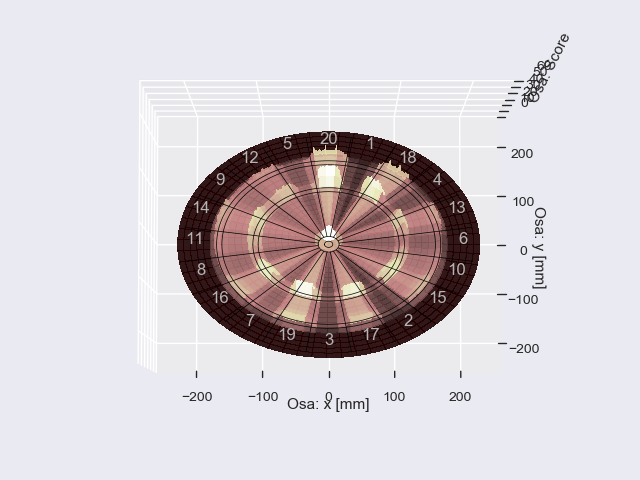

In [232]:
dartboard = DartsAvgScore(10)
plotter = DartsPlotter()
plotter.plot_dartboard(dartboard)